In [1]:
!pip install opendatasets

You should consider upgrading via the 'C:\Users\DK ID\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [2]:
cd D:\SEMESTER 7\MachineLearning\Praktikum\dataset_tumor

D:\SEMESTER 7\MachineLearning\Praktikum\dataset_tumor


In [3]:
import opendatasets as od
import os

In [4]:
{"username":"dhimaspratama","key":"306389a5af8b6241275fe1139c76a32e"}

{'username': 'dhimaspratama', 'key': '306389a5af8b6241275fe1139c76a32e'}

In [5]:
od.download('https://www.kaggle.com/denizkavi1/brain-tumor')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: dhimaspratama
Your Kaggle Key: ········


100%|███████████████████████████████████████████████████████████████████████████████| 700M/700M [05:54<00:00, 2.07MB/s]


In [39]:
cd D:\SEMESTER 7\MachineLearning\Praktikum\dataset_tumor\brain-tumor

D:\SEMESTER 7\MachineLearning\Praktikum\dataset_tumor\brain-tumor


In [40]:
!pip install split-folders

You should consider upgrading via the 'C:\Users\DK ID\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [203]:
import splitfolders

base_dir="D:\SEMESTER 7\MachineLearning\Praktikum\dataset_tumor/brain-tumor"
data_dir="D:\SEMESTER 7\MachineLearning\Praktikum\dataset_tumor/split_data"
splitfolders.ratio(base_dir, output=data_dir, seed=1337, ratio=(0.8 ,0.19 ,0.01),group_prefix=None)


Copying files: 3064 files [00:12, 236.41 files/s]


In [204]:
cd D:\SEMESTER 7\MachineLearning\Praktikum\dataset_tumor/split_data

D:\SEMESTER 7\MachineLearning\Praktikum\dataset_tumor\split_data


In [205]:
ls

 Volume in drive D is Data
 Volume Serial Number is 7453-53B1

 Directory of D:\SEMESTER 7\MachineLearning\Praktikum\dataset_tumor\split_data

04/12/2021  03:57    <DIR>          .
04/12/2021  03:57    <DIR>          ..
04/12/2021  03:57    <DIR>          test
04/12/2021  03:57    <DIR>          train
04/12/2021  03:57    <DIR>          val
               0 File(s)              0 bytes
               5 Dir(s)  39.342.075.904 bytes free


In [208]:
import os
base_dir = 'D:\SEMESTER 7\MachineLearning\Praktikum\dataset_tumor\split_data'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

train_meningioma_dir = os.path.join(train_dir, '1')
train_glioma_dir = os.path.join(train_dir, '2')
train_pituitary_dir = os.path.join(train_dir, '3')

validation_meningioma_dir = os.path.join(validation_dir, '1')
validation_glioma_dir = os.path.join(validation_dir, '2')
validation_pituitary_dir = os.path.join(validation_dir, '3')

test_meningioma_dir = os.path.join(test_dir, '1')
test_glioma_dir = os.path.join(test_dir, '2')
test_pituitary_dir = os.path.join(test_dir, '3')

In [209]:
print('Data Train : ')
print('Train Meningioma :', len(os.listdir(train_meningioma_dir)))
print('Train Glioma : ', len(os.listdir(train_glioma_dir)))
print('Train Pituitary : ', len(os.listdir(train_pituitary_dir)))
print(""*2)
print('Data Validation : ')
print('Validation Meningioma :', len(os.listdir(validation_meningioma_dir)))
print('Validationn Glioma : ', len(os.listdir(validation_glioma_dir)))
print('Validation Pituitary : ', len(os.listdir(validation_pituitary_dir)))
print(""*2)
print('Data Test : ')
print('Test Meningioma :', len(os.listdir(test_meningioma_dir)))
print('Test Glioma : ', len(os.listdir(test_glioma_dir)))
print('Test Pituitary : ', len(os.listdir(test_pituitary_dir)))

Data Train : 
Train Meningioma : 566
Train Glioma :  1140
Train Pituitary :  744

Data Validation : 
Validation Meningioma : 134
Validationn Glioma :  270
Validation Pituitary :  176

Data Test : 
Test Meningioma : 8
Test Glioma :  16
Test Pituitary :  10


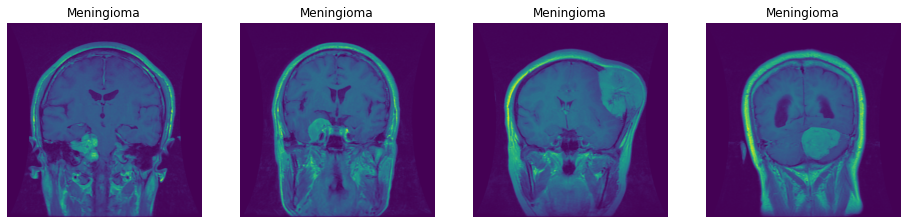

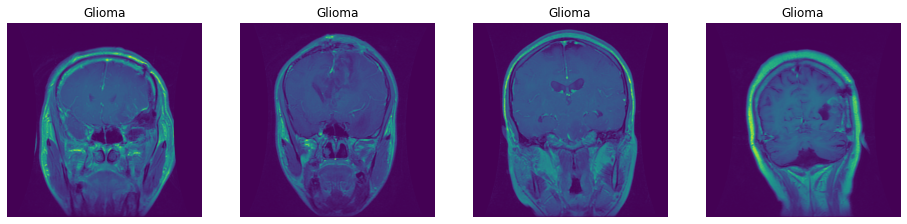

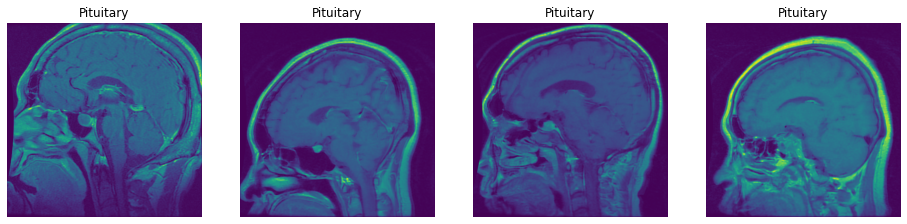

In [210]:
import matplotlib.pyplot as plt
import matplotlib.image as mping

meningioma_image = os.listdir(train_meningioma_dir)
glioma_image = os.listdir(train_glioma_dir)
pituitary_image = os.listdir(train_pituitary_dir)

fname1 = [os.path.join(train_meningioma_dir,fname)
        for fname in meningioma_image[:4]]

fname2 = [os.path.join(train_glioma_dir,fname)
        for fname in glioma_image[:4]]

fname3 = [os.path.join(train_pituitary_dir,fname)
        for fname in pituitary_image[:4]]

ncolu = 4
nrow = 2
fig = plt.gcf()
fig.set_size_inches(ncolu*4,nrow*4)
for i,fname in enumerate(fname1):
    sp = plt.subplot(2,4,i+1)
    sp.axis('off')
    img = mping.imread(fname)
    plt.title('Meningioma')
    plt.imshow(img)
plt.show()

ncolu = 4
nrow = 2
fig = plt.gcf()
fig.set_size_inches(ncolu*4,nrow*4)
for i,fname in enumerate(fname2):
    sp = plt.subplot(2,4,i+1)
    sp.axis('off')
    img = mping.imread(fname)
    plt.title('Glioma')
    plt.imshow(img)
    
plt.show()

ncolu = 4
nrow = 2
fig = plt.gcf()
fig.set_size_inches(ncolu*4,nrow*4)
for i,fname in enumerate(fname3):
    sp = plt.subplot(2,4,i+1)
    sp.axis('off')
    img = mping.imread(fname)
    plt.title('Pituitary')
    plt.imshow(img)
    
plt.show()

In [211]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from keras.callbacks import ReduceLROnPlateau

In [258]:
TRAINING_DIR = "D:\SEMESTER 7\MachineLearning\Praktikum\dataset_tumor\split_data/train"
VALIDATION_DIR = "D:\SEMESTER 7\MachineLearning\Praktikum\dataset_tumor\split_data/val"
TEST_DIR = "D:\SEMESTER 7\MachineLearning\Praktikum\dataset_tumor\split_data/test"

datagen = ImageDataGenerator(rescale= 0)

train_gen = datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=(150,150),
    shuffle=False,
    class_mode='categorical',
    batch_size = 32
)

val_gen = datagen.flow_from_directory(
    VALIDATION_DIR,
    target_size=(150,150),
    shuffle=False,
    class_mode='categorical',
    batch_size = 32
)

test_gen = datagen.flow_from_directory(
    TEST_DIR,
    target_size=(150,150),
    shuffle=False,
    class_mode='categorical',
    batch_size = 32
)

Found 2450 images belonging to 3 classes.
Found 580 images belonging to 3 classes.
Found 34 images belonging to 3 classes.


In [259]:
from tensorboard.plugins.hparams import api as hp

In [260]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [261]:
!rm -rf ./logs/ 

'rm' is not recognized as an internal or external command,
operable program or batch file.


In [262]:
HP_OPTIMIZER = hp.HParam('optimizer', hp.Discrete(['adam', 'sgd']))

METRIC_ACCURACY = 'accuracy'

hparam_summary_dir = 'D:\SEMESTER 7\MachineLearning\Praktikum\hparam_summary_tumor'

In [263]:
first_mine_model_dict = dict()
first_mine_history_dict = dict()

In [264]:
import numpy as np

In [265]:
import scipy
xtest, ytest = zip(*(test_gen[i] for i in range(len(test_gen))))
x_test, y_test = np.vstack(xtest), np.vstack(ytest)

In [266]:
# IMPORT SEMUA PAKET YANG ANDA PERLUKAN UNTUK MENDEFINISIKAN MODEL DISINI
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Conv2D,MaxPool2D, AveragePooling2D, GlobalAveragePooling2D, Flatten, BatchNormalization, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
import time

In [267]:
def train_test_model(hparams, session_num):
    global first_mine_model_dict
    global first_mine_history_dict

    model = Sequential()

    # Feature Extraction Layer
    model.add(InputLayer(input_shape=(150,150,3,)))
    model.add(Conv2D(16, 3, padding='same', activation='relu'))
    model.add(AveragePooling2D())
    model.add(Conv2D(16, 3, padding='same', activation='relu'))
    model.add(MaxPool2D())
   
    model.add(BatchNormalization())
    model.add(Flatten())

    # Fully Connected Layer
    model.add(Dense(32, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(3, activation='softmax'))

    # Compile Model
    model.compile(
        optimizer=hparams[HP_OPTIMIZER],
        loss='categorical_crossentropy',
        metrics='accuracy'
    )

    # Fit Model
    H = model.fit(train_gen,
                  validation_data=val_gen, 
                  epochs=50,
                  )
    
    # # Gather Model and History
    first_mine_model_dict[session_num] = model
    first_mine_history_dict[session_num] = H.history

    # Evaluate Model
    _, accuracy = model.evaluate(x_test, y_test)

    return accuracy

In [268]:
#Definisikan fungsi run
def first_model_run(run_dir, hparams, session_num):
    with tf.summary.create_file_writer(run_dir).as_default():
        hp.hparams(hparams)
        accuracy = train_test_model(hparams, session_num)
        tf.summary.scalar(METRIC_ACCURACY, accuracy, step=50)

In [269]:
session_num = 0
for optimizer in HP_OPTIMIZER.domain.values:
    hparams = {
        HP_OPTIMIZER: optimizer,
    }
    run_name = "first_model_run-%d" % session_num
    print('--- Starting trial: %s' % run_name)
    print({h.name: hparams[h] for h in hparams})
    first_model_run((hparam_summary_dir + '/' + run_name), hparams, session_num)
    session_num += 1

--- Starting trial: first_model_run-0
{'optimizer': 'adam'}
Epoch 1/50
77/77 [==============================] - 27s 340ms/step - loss: 1.2130 - accuracy: 0.5163 - val_loss: 1.9267 - val_accuracy: 0.3500
Epoch 2/50
77/77 [==============================] - 26s 334ms/step - loss: 0.9458 - accuracy: 0.5278 - val_loss: 0.7090 - val_accuracy: 0.6983
Epoch 3/50
77/77 [==============================] - 26s 345ms/step - loss: 0.6861 - accuracy: 0.6992 - val_loss: 2.2613 - val_accuracy: 0.4707
Epoch 4/50
77/77 [==============================] - 26s 344ms/step - loss: 0.6457 - accuracy: 0.7171 - val_loss: 1.4259 - val_accuracy: 0.5448
Epoch 5/50
77/77 [==============================] - 27s 353ms/step - loss: 0.5289 - accuracy: 0.7482 - val_loss: 0.5982 - val_accuracy: 0.7414
Epoch 6/50
77/77 [==============================] - 28s 360ms/step - loss: 0.4174 - accuracy: 0.7894 - val_loss: 2.1905 - val_accuracy: 0.5276
Epoch 7/50
77/77 [==============================] - 29s 375ms/step - loss: 0.3600 

In [270]:
import json

target_dir = 'D:\SEMESTER 7\MachineLearning\Praktikum\model_hparam'

for key, history_dict in first_mine_history_dict.items():
    # simpan history model
    history_name = f"first_model_history_run-{key}.json"
    history_save_dir = os.path.join(target_dir, history_name)
    # json.dump(history_dict, open(history_save_dir, 'w'))

for key, trained_model in first_mine_model_dict.items():
    # simpan model dan weight-nya
    trained_model_name = f"first_model_run-{key}.h5"
    trained_model_save_dir = os.path.join(target_dir, trained_model_name)
    
    trained_model_weight_name = f"first_model_weight_run-{key}.h5"
    trained_model_weight_save_dir = os.path.join(target_dir, trained_model_weight_name)
    
    trained_model.save(trained_model_save_dir)
    trained_model.save_weights(trained_model_weight_save_dir)

In [271]:
import sklearn
from keras.models import load_model
import json

import matplotlib.pyplot as plt

import numpy as np

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import seaborn as sns

In [272]:
target_dir = 'D:\SEMESTER 7\MachineLearning\Praktikum\model_hparam'

history_list = list()
model_list = list()

for dirpath, dirnames, filenames in os.walk(target_dir):
    for file in filenames:
        if '.json' in file:
            history_dir = os.path.join(dirpath, file)
            history = json.load(open(history_dir, 'r'))
            history_list.append(history)
        
        if '.h5' in file and 'weight' not in file:
            model_dir = os.path.join(dirpath, file)
            model = load_model(model_dir)
            model_list.append(model)

first_mine_history_dict = dict(zip(range(len(history_list)), history_list))
first_mine_model_dict = dict(zip(range(len(model_list)), model_list))

In [273]:
for key, trained_model in first_mine_model_dict.items():
    print(f"Model Run-{key}")
    print(trained_model.evaluate(x_test, y_test))

Model Run-0
2/2 [==============================] - 0s 4ms/step - loss: 0.8652 - accuracy: 0.9118
[0.865219235420227, 0.9117646813392639]
Model Run-1
2/2 [==============================] - 0s 4ms/step - loss: 0.8060 - accuracy: 0.6176
[0.8059907555580139, 0.6176470518112183]


In [277]:
import matplotlib.pyplot as plt
for key, history_dict in first_mine_history_dict.items():
    plt.figure(figsize = (23,5))

    plt.subplot(1, 2, 1)
    plt.xticks(fontsize='10')
    plt.yticks(fontsize='10')
    plt.plot(history_dict['accuracy'])
    plt.plot(history_dict['val_accuracy'])
    plt.title(f'Model Accuracy Run-{key}', fontsize=15)
    plt.ylabel('accuracy', fontsize=15)
    plt.xlabel('epoch', fontsize=15)
    plt.legend(['acc train', 'acc test'], loc='lower right', fontsize=15)

    plt.subplot(1, 2, 2)
    plt.xticks(fontsize='10')
    plt.yticks(fontsize='10')
    plt.plot(history_dict['loss'])
    plt.plot(history_dict['val_loss'])
    plt.title(f'Model Loss Run-{key}', fontsize=15)
    plt.ylabel('loss', fontsize=15)
    plt.xlabel('epoch', fontsize=15)
    plt.legend(['loss train', 'loss test'], loc='upper right', fontsize=15)
    plt.show()

In [275]:
for key, trained_model in first_mine_model_dict.items():
    pred = trained_model.predict(x_test)
    y_pred = (pred > 0.5).astype(np.int)

    print(f"Model Run-{key}")
    print(classification_report(y_test, y_pred))

Model Run-0
              precision    recall  f1-score   support

           0       1.00      0.62      0.77         8
           1       0.84      1.00      0.91        16
           2       1.00      1.00      1.00        10

   micro avg       0.91      0.91      0.91        34
   macro avg       0.95      0.88      0.89        34
weighted avg       0.93      0.91      0.91        34
 samples avg       0.91      0.91      0.91        34

Model Run-1
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.00      0.00      0.00        16
           2       0.71      1.00      0.83        10

   micro avg       0.71      0.29      0.42        34
   macro avg       0.24      0.33      0.28        34
weighted avg       0.21      0.29      0.25        34
 samples avg       0.29      0.29      0.29        34



C:\Users\DKID~1\AppData\Local\Temp/ipykernel_2848/119336217.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_pred = (pred > 0.5).astype(np.int)
C:\Users\DKID~1\AppData\Local\Temp/ipykernel_2848/119336217.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note 

In [291]:
cd D:\SEMESTER 7\MachineLearning\Praktikum\hparam_summary_tumor\first_model_run-0

D:\SEMESTER 7\MachineLearning\Praktikum\hparam_summary_tumor\first_model_run-0


In [313]:
%reload_ext tensorboard

In [314]:
!rm -rf ./logs/ 

'rm' is not recognized as an internal or external command,
operable program or batch file.


In [315]:
%tensorboard --logdir "D:\SEMESTER 7\MachineLearning\Praktikum\hparam_summary_tumor"

Reusing TensorBoard on port 6006 (pid 17824), started 0:09:55 ago. (Use '!kill 17824' to kill it.)

In [306]:
!kill 11528

'kill' is not recognized as an internal or external command,
operable program or batch file.


In [285]:
tensorboard --inspect --logdir 'D:\SEMESTER 7\MachineLearning\Praktikum\hparam_summary_tumor'

ERROR: Failed to launch TensorBoard (exited with 0).
Contents of stdout:
Processing event files... (this can take a few minutes)

Found event files in:
D:\SEMESTER 7\MachineLearning\Praktikum\hparam_summary_tumor\first_model_run-0
D:\SEMESTER 7\MachineLearning\Praktikum\hparam_summary_tumor\first_model_run-1

These tags are in D:\SEMESTER 7\MachineLearning\Praktikum\hparam_summary_tumor\first_model_run-0:
audio -
histograms -
images -
scalars -
tensor
   _hparams_/session_start_info
   accuracy
   batch_accuracy
   batch_loss

Event statistics for D:\SEMESTER 7\MachineLearning\Praktikum\hparam_summary_tumor\first_model_run-0:
audio -
graph -
histograms -
images -
scalars -
sessionlog:checkpoint -
sessionlog:start -
sessionlog:stop -
tensor
   first_step           0
   last_step            50
   max_step             3850
   min_step             0
   num_steps            3851
   outoforder_steps     [(77, 0), (77, 0), (77, 0), (77, 0), (77, 0), (77, 0), (1848, 50), (50, 0), (3850, 50), (